# PyTorch Neural Network Classification

## 0. Architecture of a Classification Neural Network

| Hyperparameter              | Binary Classification                                                                 | Multiclass Classification                                              |
|-----------------------------|----------------------------------------------------------------------------------------|------------------------------------------------------------------------|
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)**          | Problem specific, minimum = 1, maximum = unlimited                                    | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512                                                  | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other)                                                         | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation**  | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) (rectified linear unit) but can be many others | Same as binary classification |
| **Output activation**        | Sigmoid (`torch.sigmoid` in PyTorch)                                                   | Softmax (`torch.softmax` in PyTorch) |
| **Loss function**            | Binary cross-entropy (`torch.nn.BCELoss` in PyTorch)                                   | Cross entropy (`torch.nn.CrossEntropyLoss` in PyTorch) |
| **Optimizer**                | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see `torch.optim` for more options) | Same as binary classification |


## 1. Making Classification Data

In [2]:
import torch
import requests
import pandas as pd
from torch import nn
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [3]:
n_samples = 1000# how many samples we want
X, y = make_circles(n_samples,
                    noise=0.03,  # a little bit of noise to the dots
                    random_state=42)  # keep random state so we get the same values

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [6]:
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y
                        })
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [7]:
# Checking different labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

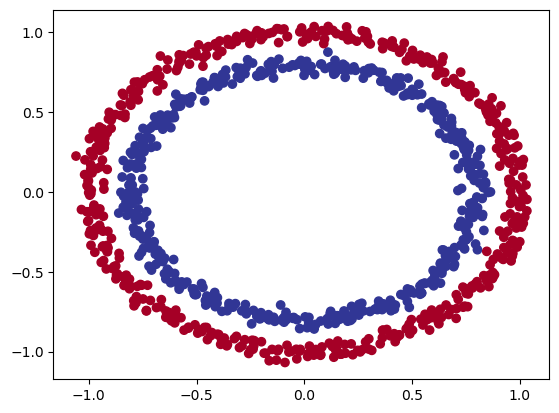

In [8]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [9]:
# Checking the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# Visualising first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and  for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and  for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


> Two feature of X trying to predict one label of y.

- ### Turning Data into Tensors and Create Train and Test Splits

1. Turn our data into tensors (right now our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).
2. Split our data into training and test sets (we'll train a model on the training set to learn the patterns between X and y and then evaluate those learned patterns on the test dataset).

In [11]:
X = torch.from_numpy(X).type(torch.float)# convert to torch float tensor
y = torch.from_numpy(y).type(torch.float)# convert to torch float tensor
# View the first five samples
X[:5], y[:5]# View the first five samples

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,  # 20% test, 80% train
                                                    random_state=42)  # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a Model 

In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Creating a model class that:
- Subclasses `nn.Module` (almost all PyTorch models are subclasses of `nn.Module`).
- Creates 2 `nn.Linear` layers in the constructor capable of handling the input and output shapes of X and y.
- Defines a `forward()` method containing the forward pass computation of the model.
- Instantiates the model class and sends it to the target device.


In [14]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #create 2 nn.Linear layers capable of handling the input and output shapes of X and y
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features, outputs 5
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, outputs 1
    
    def forward(self, x):
        # return the output of layer_2, a single feature, the same shape as y
        # computation goes through layer_1 first then the output of layer_1 goes through layer_2
        return self.layer_2(self.layer_1(x))

# Instantiate the model and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

- Implementing with `nn.Sequential`:

In [15]:
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)# 2 input features, 5 hidden units, 1 output feature
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
# Making predictions with model_0
untrained_preds = model_0(X_test.to(device))# make predictions on the test data
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.1072],
        [-0.2333],
        [-0.0171],
        [-0.1317],
        [-0.3987],
        [-0.4727],
        [-0.5253],
        [-0.5824],
        [-0.0011],
        [-0.2460]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [17]:
# creating a loss function
loss_fn = nn.BCEWithLogitsLoss()# BCE = Binary Cross Entropy, with logits = for numerical stability with inbuilt sigmoid layer

# creating an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),# SGD = Stochastic Gradient Descent
                            lr=0.1) # lr = learning rate

- #### Creating Evaluation Metric


In [18]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()# count number of correct predictions
    acc = (correct / len(y_pred)) * 100# calculate accuracy
    return acc

## 3. Train Model

### 3.1 Going From Raw Model Outputs to Predicted Labels (Logits -> Prediction Probabilities ->Pprediction Labels)

First we check what comes out of our model during the forward pass.

In [19]:
# first 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1072],
        [-0.2333],
        [-0.0171],
        [-0.1317],
        [-0.3987]], grad_fn=<SliceBackward0>)

In [20]:
# using sigmoid on model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4732],
        [0.4419],
        [0.4957],
        [0.4671],
        [0.4016]], grad_fn=<SigmoidBackward0>)

To turn our prediction probabilities into prediction labels we can round the outputs of the sigmoid activation function.

In [21]:
#finding the predicted labels by rounding the prediction probabilities
y_preds = torch.round(y_pred_probs)

# in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

#checking for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#removing extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

In [22]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 3.2 Building a Training and Testing Loop

In [27]:
torch.manual_seed(42)

epochs = 100

#putting data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#building training and evaluation loop
for epoch in range(epochs):
    # Training
    model_0.train()# put model in training mode
    
    #1. Forward pass
    y_logits = model_0(X_train).squeeze()# model outputs logits of shape [batch_size, 1] -> squeeze to remove extra dimension -> [batch_size]
    y_pred = torch.round(torch.sigmoid(y_logits))# turn logits into prediction probabilities then round them to get predicted labels of shape
    
    #2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)# logits and labels are same shape [batch_size]
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()# set gradients to zero
    
    #4. Loss backward
    loss.backward()# backpropagation to get gradients of loss w.r.t. parameters
    
    #5. Optimizer step
    optimizer.step()# update parameters using gradients
    
    # Testing
    model_0.eval()# put model in evaluation mode
    with torch.inference_mode():# turn off gradients for evaluation
        #1. Forward pass
        test_logits = model_0(X_test).squeeze()# model outputs logits of shape
        test_pred = torch.round(torch.sigmoid(test_logits))
        #2. Calculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 45.50%
Epoch: 10 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 45.50%
Epoch: 20 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 45.50%
Epoch: 30 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 45.50%
Epoch: 40 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 45.50%
Epoch: 50 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 45.50%
Epoch: 60 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 45.50%
Epoch: 70 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 45.50%
Epoch: 80 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 45.50%
Epoch: 90 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69468, Test acc: 45.50%


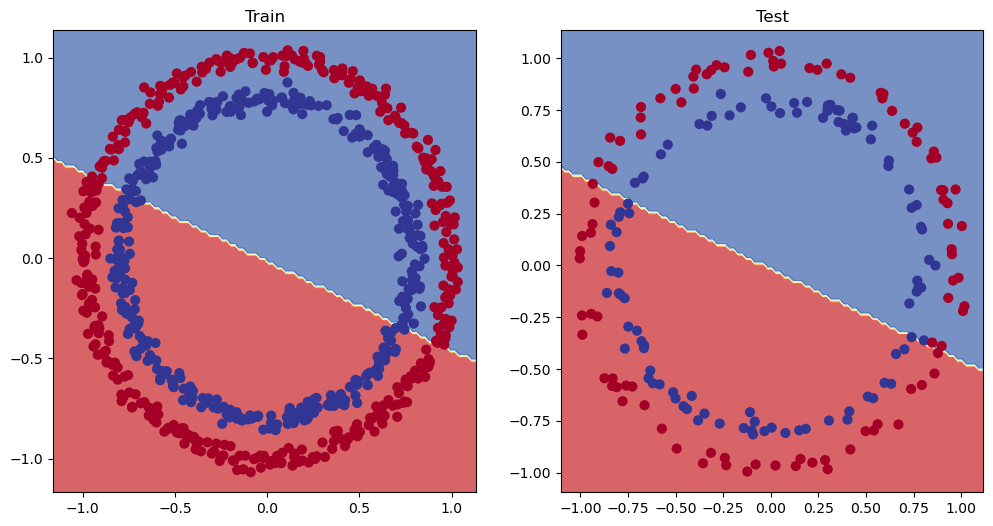

In [30]:
# Plotting decision boundaries for training and test sets
from helper_functions import plot_decision_boundary, plot_predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)